https://github.com/sriram2397/digit-recognizer-kaggle/blob/master/Digit_Recognizer.ipynb --> score = 0.99164

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

2023-04-10 17:16:16.730349: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-10 17:16:16.735989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 17:16:16.888454: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 17:16:16.891934: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 17:16:17.905894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [6]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

<Axes: xlabel='label', ylabel='count'>

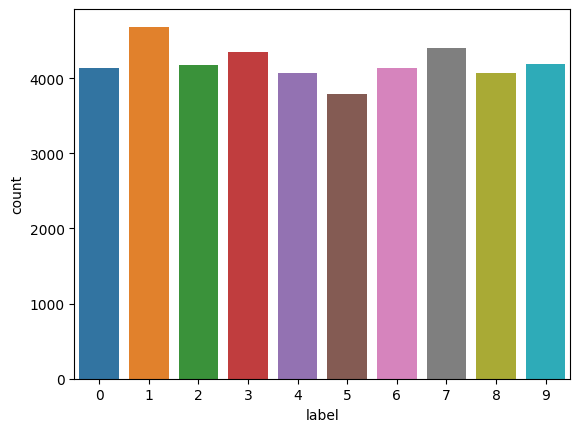

In [8]:
sns.countplot(x='label', data=train)

In [9]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [11]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [12]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

Text(0.5, 1.0, '5')

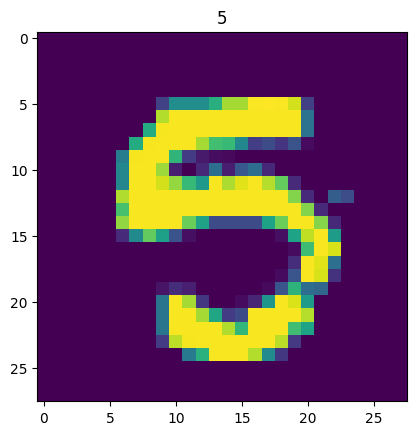

In [17]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax())

In [18]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [19]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 layer_conv1 (Conv2D)        (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 maxPool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 14, 14, 32)        18464     
                                                           

In [20]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

Epoch 1/10
378/378 [==============================] - 18s 43ms/step - loss: 0.5389 - accuracy: 0.8260 - val_loss: 3.5196 - val_accuracy: 0.1433
Epoch 2/10
378/378 [==============================] - 13s 34ms/step - loss: 0.1365 - accuracy: 0.9603 - val_loss: 0.0649 - val_accuracy: 0.9810
Epoch 3/10
378/378 [==============================] - 13s 34ms/step - loss: 0.0964 - accuracy: 0.9728 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 4/10
378/378 [==============================] - 13s 35ms/step - loss: 0.0795 - accuracy: 0.9783 - val_loss: 0.0866 - val_accuracy: 0.9764
Epoch 5/10
378/378 [==============================] - 13s 34ms/step - loss: 0.0653 - accuracy: 0.9817 - val_loss: 0.0427 - val_accuracy: 0.9874
Epoch 6/10
378/378 [==============================] - 13s 34ms/step - loss: 0.0589 - accuracy: 0.9832 - val_loss: 0.0786 - val_accuracy: 0.9790
Epoch 7/10
378/378 [==============================] - 13s 34ms/step - loss: 0.0534 - accuracy: 0.9849 - val_loss: 0.0469 - val_accuracy:

In [21]:
# SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

/home/adambehun/.local/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0286 - accuracy: 0.9925 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 2/30
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0261 - accuracy: 0.9925 - val_loss: 0.0377 - val_accuracy: 0.9907
Epoch 3/30
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0244 - accuracy: 0.9934 - val_loss: 0.0370 - val_accuracy: 0.9905
Epoch 4/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 0.0363 - val_accuracy: 0.9919
Epoch 5/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0227 - accuracy: 0.9937 - val_loss: 0.0369 - val_accuracy: 0.9905
Epoch 6/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0367 - val_accuracy: 0.9905
Epoch 7/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0197 - accuracy: 0.9947 - val_loss: 0.0362 -

In [22]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 7s 7ms/step
